# Steps :-
# 1. Read and check the dataset if it is balanced or not.
# 2. Eleminate rows with word length less than 20.
# 3. Balance the dataset with equal no. of samples from both the classes.

In [1]:
# Import Required Libraries

import numpy as np

import pandas as pd

from sklearn.utils import resample

import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize

C:\Users\ketan\AppData\Local\Temp\ipykernel_22200\546601011.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read Original Dataset

toys = pd.read_csv("toys.csv")

CPU times: total: 15.1 s
Wall time: 15.4 s


In [3]:
# First five rows from the dataset

toys.head()

,Unnamed: 0,reviewText,class
0,0,I love these felt nursery rhyme characters and...,1
1,1,I see no directions for its use. Therefore I h...,0
2,2,This is a great tool for any teacher using the...,1
3,3,"Great product, thank you! Our son loved the pu...",1
4,4,Although not as streamlined as the Algebra I m...,1


<Axes: xlabel='count', ylabel='class'>

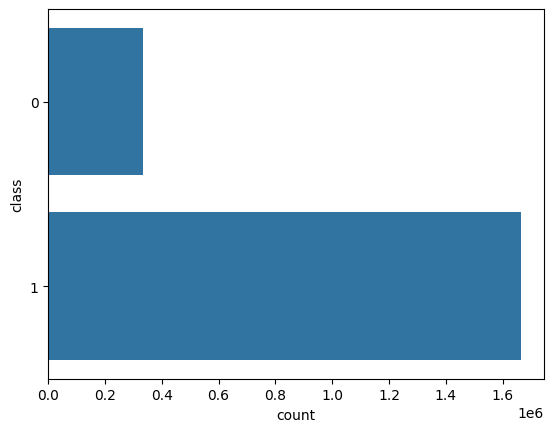

In [4]:
# Countplot to check weather the labels from the dataset are balanced or not

sns.countplot(y=toys['class'])

In [7]:
# As the labels are imbalanced so we need to balance them.

In [5]:
# As We are using LSTM (Bidirectional) and Pad sequencing for input to this model.
# We need to restrict no of words to greater than 20 in review

def tokenize(text):
    ''' Takes String as an Input and 
        returns list of Tokens.
    '''
    
    return word_tokenize(text)

In [6]:
# Apply above function to each review from the dataset
%%time
toys['reviewText'] = toys['reviewText'].apply(tokenize)

CPU times: total: 41min 23s
Wall time: 58min 51s


In [7]:
# First five Rows from the tokenized Dataset

toys.head()

,Unnamed: 0,reviewText,class
0,0,"[I, love, these, felt, nursery, rhyme, charact...",1
1,1,"[I, see, no, directions, for, its, use, ., The...",0
2,2,"[This, is, a, great, tool, for, any, teacher, ...",1
3,3,"[Great, product, ,, thank, you, !, Our, son, l...",1
4,4,"[Although, not, as, streamlined, as, the, Alge...",1


In [9]:
# Store this tokenized dataset for future use

# toys.to_csv("toys_token.csv")

In [12]:
%%time
# A new column named length is added which contains the length of list containing tokens

toys['length'] = toys['reviewText'].apply(len)

CPU times: total: 15.1 s
Wall time: 38.8 s


In [13]:
# First five rows from the dataset after adding length column
toys.head()

,Unnamed: 0,reviewText,class,length
0,0,"[I, love, these, felt, nursery, rhyme, charact...",1,130
1,1,"[I, see, no, directions, for, its, use, ., The...",0,19
2,2,"[This, is, a, great, tool, for, any, teacher, ...",1,35
3,3,"[Great, product, ,, thank, you, !, Our, son, l...",1,27
4,4,"[Although, not, as, streamlined, as, the, Alge...",1,27


# Balance the dataset
### To use machine learning models except deep learning use only this step.
### And For Deep Learning specificaly for RNN use all three steps from this file.

In [14]:
def balance(dataframe):
    '''Takes Dataframe as input and sorts data according to class
        and then according to length of list( >= 20).
        
        Then Resample the dataset with discarding original values
        and replacing with new ones.
        
        Then Concatenates to form the dataset with toatl of 
        6 Lakh rows.
        
        And returns the balanced Dataset
    '''
    
    # Sort the data according to class ham.
    ham_data = dataframe[dataframe['class'] == 0 ]
    # From sorted Data eleminate entries with word length <= 20.
    ham_data = ham_data[ham_data['length'] >= 20]
    
    # Sort the data according to class spam.
    spam_data = dataframe[dataframe['class'] == 1 ]
    # From sorted Data eleminate entries with word length <= 20.
    spam_data = spam_data[spam_data['length'] >= 20]
    
    # No of samples of each class.
    n_samples = 300000
    
    # Resample with random state 24 for both the classes.
    ham_resampled = resample(ham_data, replace=False, n_samples=n_samples, random_state=24)
    spam_resampled = resample(spam_data, replace=False, n_samples=n_samples, random_state=24)

    # Concatenate both the classes to form single dataset
    balanced_dataset = pd.concat([ham_resampled, spam_resampled])
    
    # Shuffle the dataset
    balanced_dataset = balanced_dataset.sample(frac=1, random_state=24).reset_index(drop=True)
    
    return balanced_dataset

In [15]:
# Apply the above function to orginal dataset
toys_data = balance(toys)

In [16]:
# From here onwards columns other than 'reviewText' and 'class' are useless so remove them.
toys_data = toys_data[['reviewText','class']]

<Axes: xlabel='count', ylabel='class'>

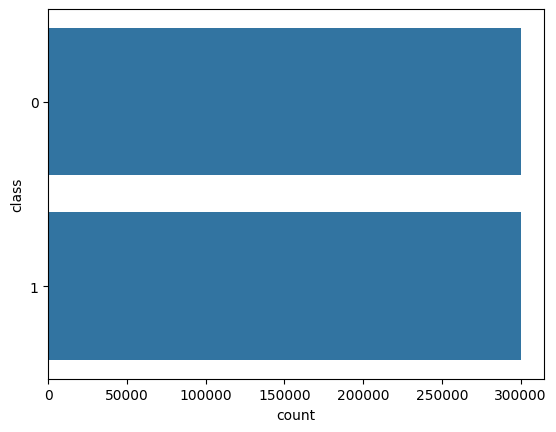

In [17]:
# To check if the dataset is balanced or not
sns.countplot(y=toys_data['class'])

In [18]:
# To save the balanced Dataset to use for training purposes
toys_data.to_csv("toys_data.csv")